# Trees to Classify Schools as Private or Public

In [23]:
#install.packages("rpart.plot", repos='http://cran.us.r-project.org')

In [2]:
library(ISLR)
library(ggplot2)

In [3]:
head(College)
df <- College

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


## EDA

### Scatterplot of grad.rate vs room.board

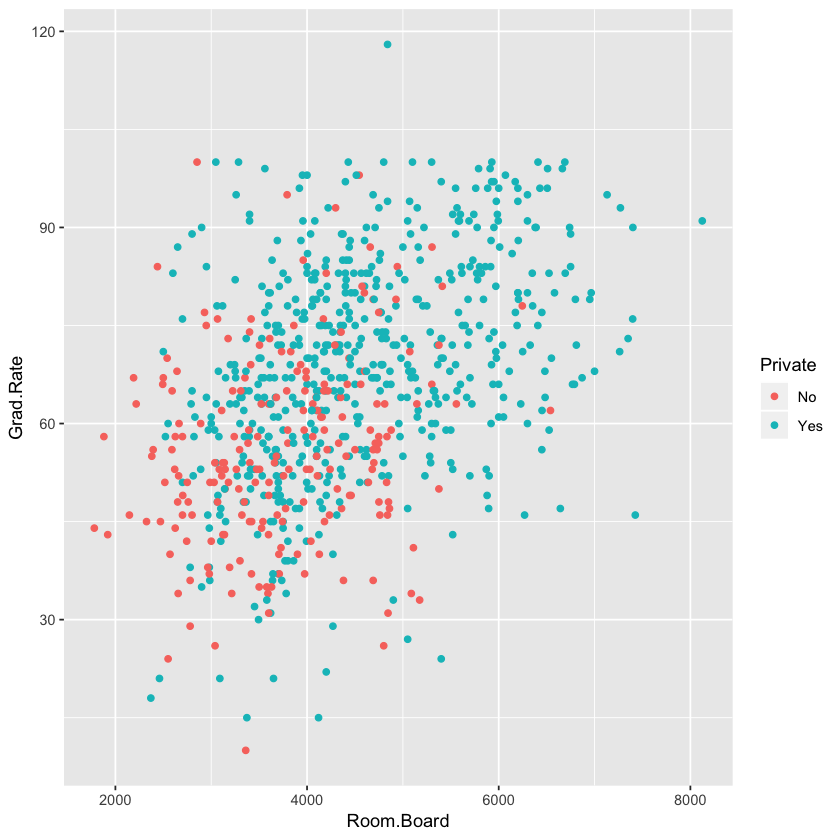

In [4]:
ggplot(df, aes(Room.Board, Grad.Rate)) + geom_point(aes(color=Private))

### Histogram of full time undergrad students, color by Private

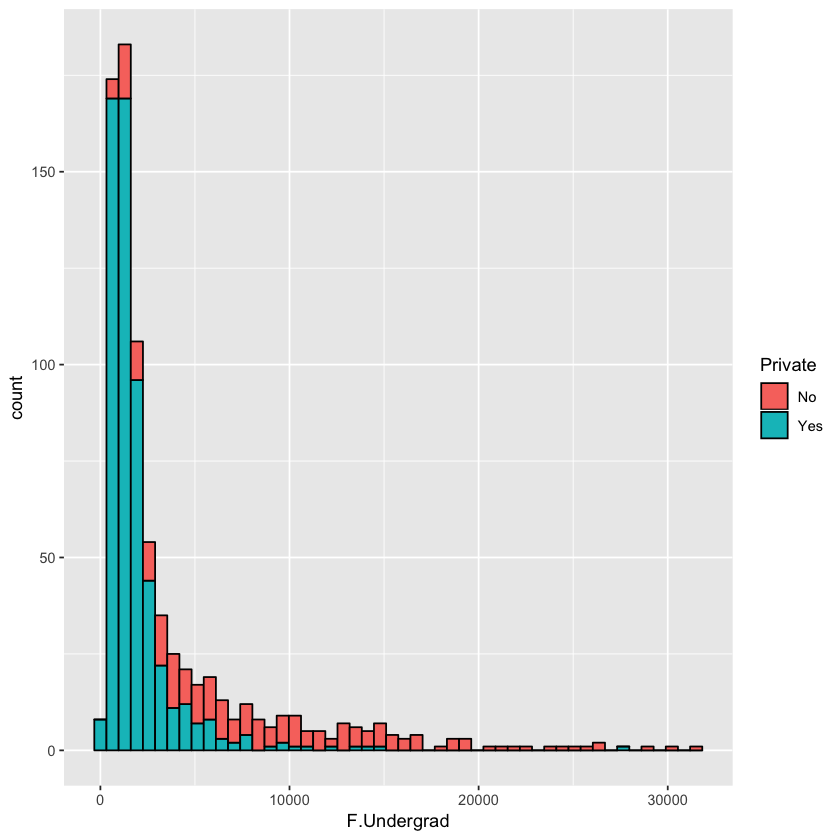

In [6]:
ggplot(df, aes(F.Undergrad)) + geom_histogram(aes(fill=Private), color='black', bins=50)

### Histogram of Grad.Rate colored by Private

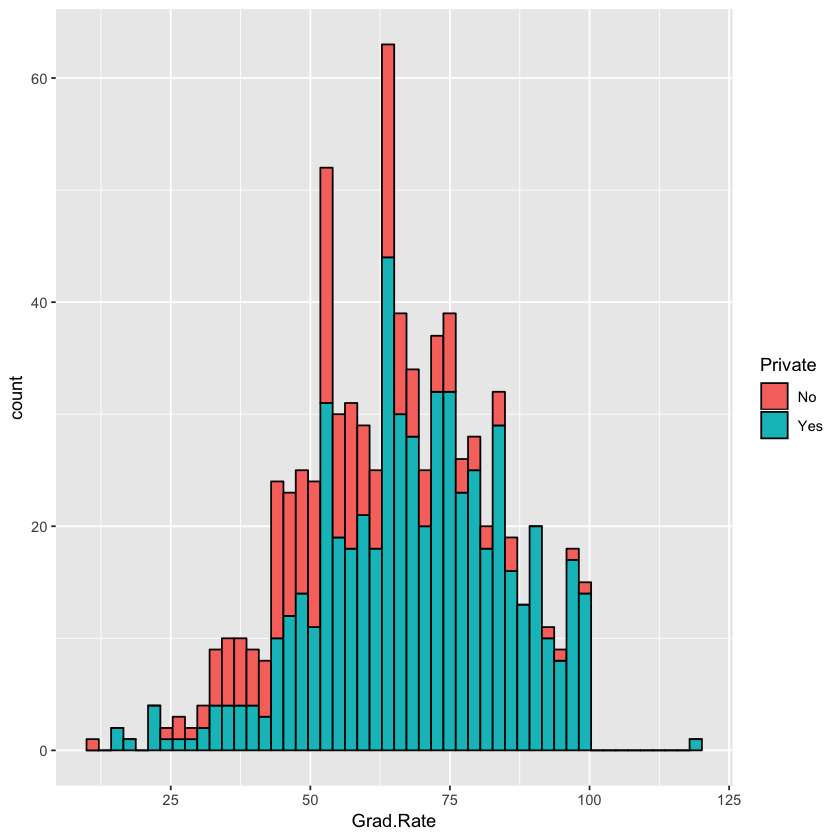

In [8]:
ggplot(df, aes(Grad.Rate)) + geom_histogram(aes(fill=Private), color='black', bins=50)

In [9]:
subset(df,Grad.Rate > 100)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


Cazenovia College has gradrate > 100??? Change to 100%

In [10]:
df['Cazenovia College','Grad.Rate'] <- 100

## Train Test Split

In [11]:
library(caTools)
set.seed(101)
split <- sample.split(df$Private, SplitRatio = 0.7)
train = subset(df, split == T)
test = subset(df, split == FALSE)

## Decision Tree

In [15]:
library(rpart)
#predict whether or not a school is Private
tree <- rpart(Private ~., method = 'class', data = train)
tree_predictions <- predict(tree, test)
head(tree_predictions)

,No,Yes
Adrian College,0.003311258,0.9966887
Alfred University,0.003311258,0.9966887
Allegheny College,0.003311258,0.9966887
Allentown Coll. of St. Francis de Sales,0.003311258,0.9966887
Alma College,0.003311258,0.9966887
Amherst College,0.003311258,0.9966887


In [16]:
#combine predictions and target(private/public)
tree_predictions <- as.data.frame(tree_predictions)
head(tree_predictions)
joiner <- function(x){
  if(x>=0.5){
    return('Yes')
  }else{
    return('No')
  }
}

tree_predictions$Private <- sapply(tree_predictions$Yes, joiner)
head(tree_predictions)

,No,Yes
Adrian College,0.003311258,0.9966887
Alfred University,0.003311258,0.9966887
Allegheny College,0.003311258,0.9966887
Allentown Coll. of St. Francis de Sales,0.003311258,0.9966887
Alma College,0.003311258,0.9966887
Amherst College,0.003311258,0.9966887


,No,Yes,Private
Adrian College,0.003311258,0.9966887,Yes
Alfred University,0.003311258,0.9966887,Yes
Allegheny College,0.003311258,0.9966887,Yes
Allentown Coll. of St. Francis de Sales,0.003311258,0.9966887,Yes
Alma College,0.003311258,0.9966887,Yes
Amherst College,0.003311258,0.9966887,Yes


     
       No Yes
  No   57   9
  Yes   7 160

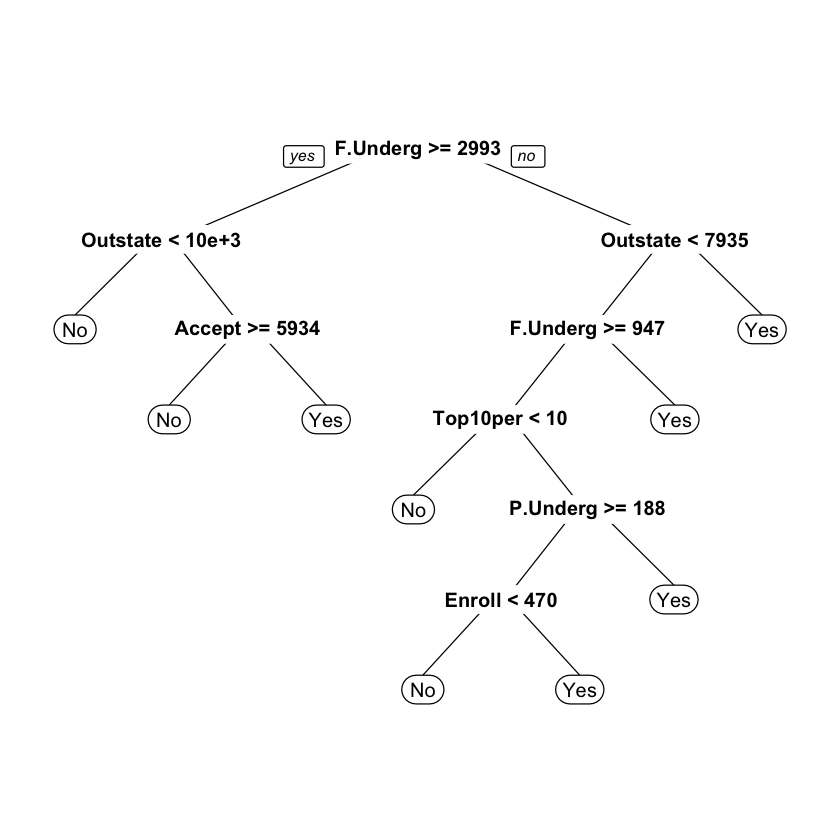

In [19]:
#confusion matrix
table(tree_predictions$Private, test$Private)
#plot
library(rpart.plot)
prp(tree)

## Random Forest

In [21]:
library(randomForest)
rf_model <- randomForest(Private ~., data=train, importance = TRUE)
rf_model$confusion
rf_model$importance

,No,Yes,class.error
No,125,23,0.15540541
Yes,10,386,0.02525253


,No,Yes,MeanDecreaseAccuracy,MeanDecreaseGini
Apps,0.025352083,0.0155921822,0.0182894939,9.822088
Accept,0.024416339,0.0144443914,0.0168994330,11.669816
Enroll,0.038091026,0.0258898530,0.0290330587,19.752041
Top10perc,0.010567274,0.0046135016,0.0062985977,5.968607
Top25perc,0.003743788,0.0040345093,0.0039509900,4.534201
F.Undergrad,0.149922362,0.0718307016,0.0928772666,41.898766
P.Undergrad,0.046372367,0.0057164783,0.0167540196,16.868974
Outstate,0.146274922,0.0604789755,0.0835937505,42.701792
Room.Board,0.016596295,0.0120796366,0.0133877615,10.645187
Books,0.001183153,0.0001090968,0.0004123215,2.289546


In [22]:
#predictions
pred <- predict(rf_model, test)
table(pred, test$Private)

     
pred   No Yes
  No   56   6
  Yes   8 163

Forest preformed better than a single tree.